### Model

|Type  | Symbol              | Code     | Description     |
|:-----|:-------------------:|:---------|:----------------|
|      | $O_{j}(t,\lambda)$  | O        | observed signal from the $j$-th laser at time $t$ at spectral wavelength $\lambda$  | 
|Const | $s_{i}(\lambda)$    | S        | emission spectrum of sensor associated with $i$-th neuromodulator                   | 
|Const | $e_{j}(\lambda)$    | E        | time-invariant spectral signature of $j$-th excitation laser                        | 
|Const | $\mu_\textrm{oxy}(\lambda)$   | Mu_ox  | Spectrum of oxygenated hemolobin                                            |
|Const | $\mu_\textrm{deoxy}(\lambda)$ | Mu_dox | Spectrum of deoxygenated hemolobin                                          |
|Param | $w_{ij}$              | W        | emission efficiency of $i$-th neuromodulator excited by $j$-th laser              | 
|Param | $a_{i}(t)$            | A        | sensor signal from time varying amount for the $i$-th neuromodulator              | 
|Param | $n_{j}(t)$            | N        | noise from $j$-th laser                                                           | 
|Param | $b_{j}(\lambda)$      | B        | fiber fluorescence triggered by $j$-th laser                                      | 
|Param | $m(t)$                | M        | motion correction (potentially depends on $i$)                                    | 
|Param | $h_\textrm{oxy}(t)$   | H_ox     | Hemodynamics (oxygenated component)                                               |
|Param | $h_\textrm{deoxy}(t)$ | H_dox    | Hemodynamics (deoxygenated component)                                             |



\begin{align*}
O_{j}(t,\lambda)  &= \{ \left( \sum_{i \in \{\textrm{sensors}\},\textrm{autofluorescence}}{\left(a_{i}(t)s_{i}({\lambda})w_{ij}\right)} + e_{j}(\lambda) \right) &\\
& \times \left( h_{\textrm{oxy}}(t)\mu_{\textrm{oxy}}(\lambda)
+ h_{\textrm{deoxy}}(t)\mu_{\textrm{deoxy}}(\lambda) \right) \times m(t) &\\
&+ b_{j}(\lambda) \} \times n_{j}(t)
\end{align*}


- $a_{i}(t)$ for  $i \in \textrm{autofluorescence}$ is slow
- $a_{i}(t)$ for  $i \in \textrm{sensors}$ can be fast (prior: 50 ms to 1 s) or slow (prior: 10 s to 50 s)
- $a_{i}(t) := c_{i}\{f(t)s_\textrm{bright}(\lambda) + (1-f(t))s_\textrm{dark}(\lambda)\}$ : a single sensor population exists in two states (e.g. bright and dark) that have their own emission spectra (also see Isosbestic point).
- $n_{j}(t)$ : white noise spectrum, power mostly in high frequency components.
- $h_{\textrm{oxy}}(t), h_{\textrm{deoxy}}(t)$ : Slow dynamics, with the fastest dynamics occurring at 0.5 Hz
- For each $j$, a spectral band (around excitation wavelength $\lambda^{\dagger}_{j}$ ) has no information because the pixels are saturated. The diffraction pattern around these pixels is dominated by signal from the laser itself. This might provide an approximation for terms like $h_{\textrm{oxy}}(t)$ ... etc. These could be used as inputs instead of parameters to fit in the above equation.


$$
\def\lexc{\lambda^{\dagger}_{j}}
O_{j}(t,\lexc) = [e_{j}(\lexc) \times\{
h_{\textrm{oxy}}(t)\mu_{\textrm{oxy}}(\lexc)
+h_{\textrm{deoxy}}(t)\mu_{\textrm{deoxy}}(\lexc)\} \times m(t) + b_{j}(\lexc)] \times{n_{j}(t)}$$


Paths are for dataset tagged: all
Paths are for dataset tagged: all


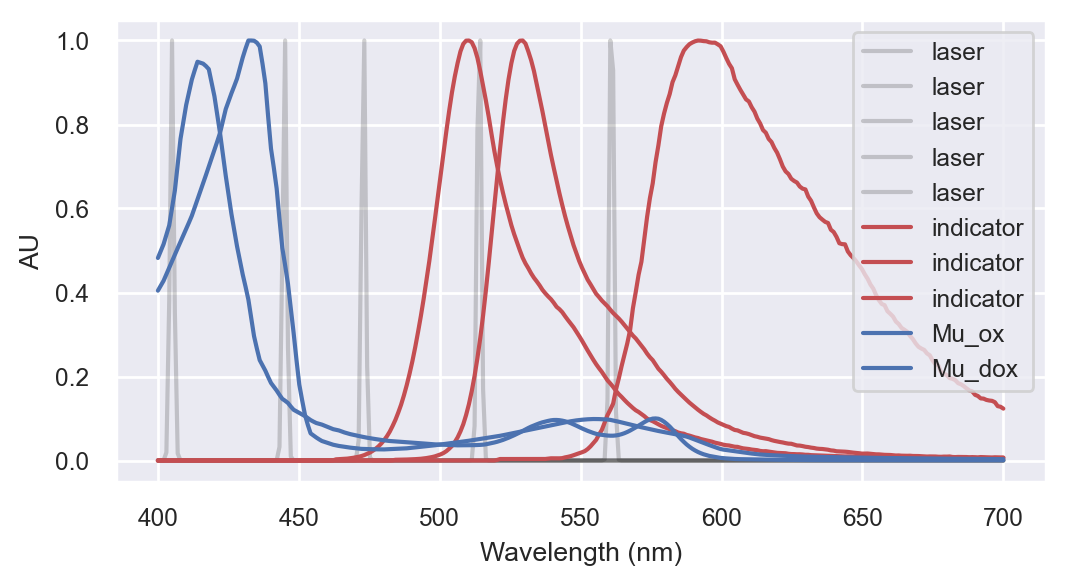

In [12]:
# Testing simulation class
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from timebudget import timebudget
sns.set_theme(font_scale=0.8)
%config InlineBackend.figure_format='retina'

from sourcesep.sim import SimData
from sourcesep.utils.config import load_config

paths = load_config(dataset_key='all')
sim = SimData(T=1000, cfg_path=paths['root'] / "sim_config.toml")

In [ ]:

S = sim.get_S()
W = sim.get_W()
E = sim.get_E()
Mu_ox, Mu_dox = sim.get_Mu()

f, ax = plt.subplots(figsize=(6,3))
ax.plot(sim.L_arr, sim.E.T,'k',alpha=0.2,  label='laser')
ax.plot(sim.L_arr, sim.S.T,'r', label='indicator')
ax.plot(sim.L_arr, Mu_ox, 'b',label='Mu_ox')
ax.plot(sim.L_arr, Mu_dox, 'b',label='Mu_dox')
ax.set(xlabel='Wavelength (nm)', ylabel='AU')
plt.legend()
plt.show()


In [13]:
sim.W_df

,405,445,473,514,561
EGFP,0.1732,0.3915,0.8143,0.1469,0.0043
Venus,0.0572,0.0505,0.2174,1.0000,0.0000
mApple,0.0069,0.0294,0.0920,0.3863,0.8972


In [ ]:
# example activity trace
with timebudget('sample generation'):
    A = sim.gen_A()

plt.subplots(figsize=(5,2))
plt.plot(sim.T_arr, A)
plt.show()

In [ ]:
# sample generation time cost
for i in range(10):
    with timebudget('20s sample (1k points)'):
        o = sim.compose_obs()